In [12]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture as GMM
from sklearn.metrics import accuracy_score

In [13]:
# сформируем исходные условия
# количество изделий произведенных на станке №1 (кластер 1)
N1 = 6000
# количество изделий произведенных на станке №2 (кластер 2)
N2 = 4000
# суммарное количество изделий произведенных на обоих станках
N = N1 + N2

# диаметр изделий станка №1
mu_samples_1_1 = 64.
# вес изделий станка №1
mu_samples_1_2 = 14.

# диаметр изделий станка №2
mu_samples_2_1 = 52.
# вес изделий станка №2
mu_samples_2_2 = 9.5

# стандартное отклонение диаметров изделий станка №1
sigma_samples_1_1 = 3.5
# стандартное отклонение веса изделий станка №1
sigma_samples_1_2 = 1.

# стандартное отклонение диаметров изделий станка №2
sigma_samples_2_1 = 2.
# стандартное отклонение веса изделий станка №2
sigma_samples_2_2 = 0.7


# количество станков
k = 2

X = np.zeros((N, 2))

np.random.seed(seed=42)
# инициализируем данные по деталям, произведенных на станке №1
X[:N1, 0] = np.random.normal(loc=mu_samples_1_1, scale=sigma_samples_1_1, size=N1)
X[:N1, 1] = np.random.normal(loc=mu_samples_1_2, scale=sigma_samples_1_2, size=N1)
# инициализируем данные по деталям, произведенных на станке №2
X[N1:N, 0] = np.random.normal(loc=mu_samples_2_1, scale=sigma_samples_2_1, size=N2)
X[N1:N, 1] = np.random.normal(loc=mu_samples_2_2, scale=sigma_samples_2_2, size=N2)

# зафиксируем правильные ответы для оценки качества алгоритма (в обучении не используется)
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N] = np.array((2))

In [16]:
np.random.seed(1)
model = GMM(n_components=k, covariance_type='full')
model.fit(X)


temp_predict_X = model.predict(X)
X_answers = []
for i in range(X.shape[0]):
    if temp_predict_X[i] == 0:
        X_answers.append(1)
    else:
        X_answers.append(2)
        

print('Доля правильно распознанных изделий')
print(round(accuracy_score(y, X_answers),6))


Доля правильно распознанных изделий
0.9998


In [8]:
temp_predict_X.shape

(10000,)

In [10]:
(temp_predict_X == 0).sum()

5998

In [11]:
(temp_predict_X == 1).sum()

4002

In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (23,9)

data = sm.datasets.macrodata.load_pandas().data

#Преобразуем данные из колонок в индекс. В данном случае проще всего было сгенерировать самим последовательность кварталов, чтобы не мучаться с конвертацией столбцов
data.index = pd.date_range(start = '01.01.1959', periods = len(data), freq='Q')
display(data)
data = data.drop(columns = ['year', 'quarter'])

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [5]:
type(data)

pandas.core.frame.DataFrame

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='pop'>, <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

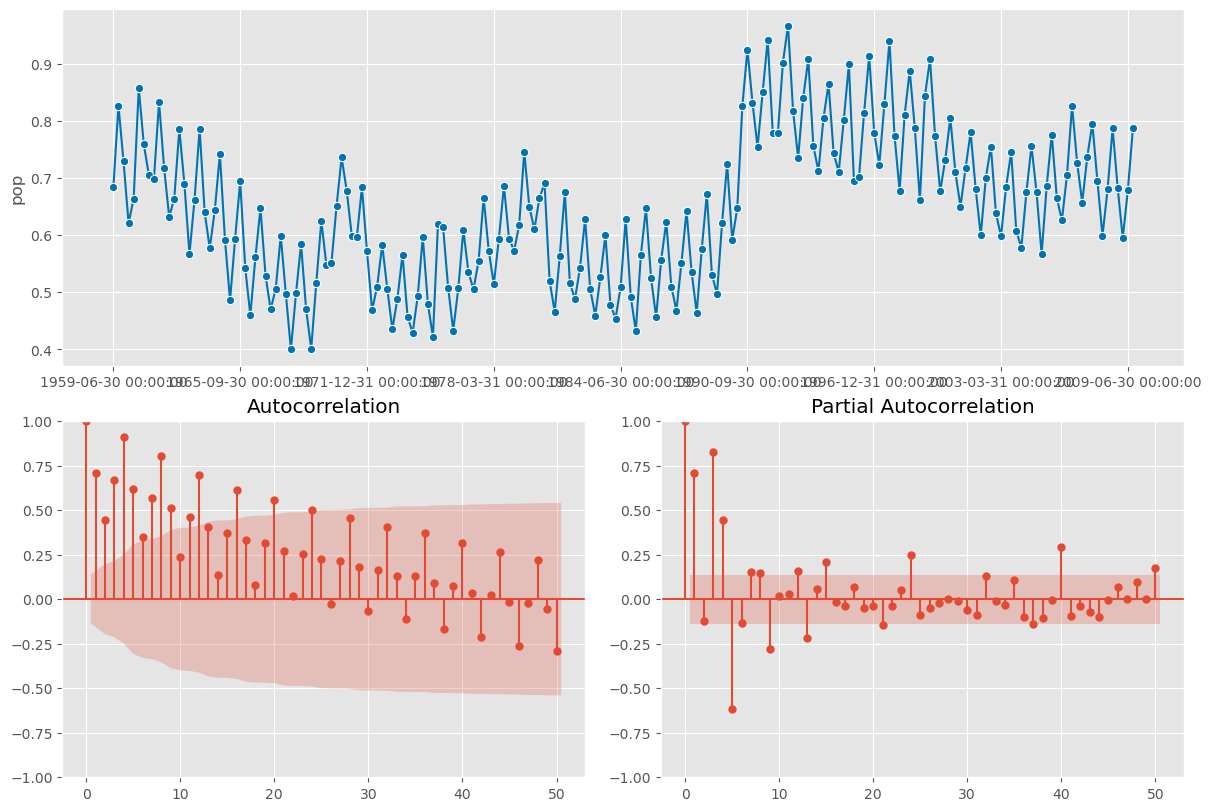

In [2]:
from sktime.utils.plotting import plot_correlations
plot_correlations(data.loc[:,'pop'].diff().dropna(), lags = 50 )

In [10]:
data.loc[:,'pop']

1959-03-31    177.146
1959-06-30    177.830
1959-09-30    178.657
1959-12-31    179.386
1960-03-31    180.007
               ...   
2008-09-30    305.270
2008-12-31    305.952
2009-03-31    306.547
2009-06-30    307.226
2009-09-30    308.013
Freq: Q-DEC, Name: pop, Length: 203, dtype: float64

# EM на ирисах

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Accuracy =  0.8933333333333333
Accuracy using GMM =  0.9666666666666667


/home/velikiyburyat/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Petal Width')

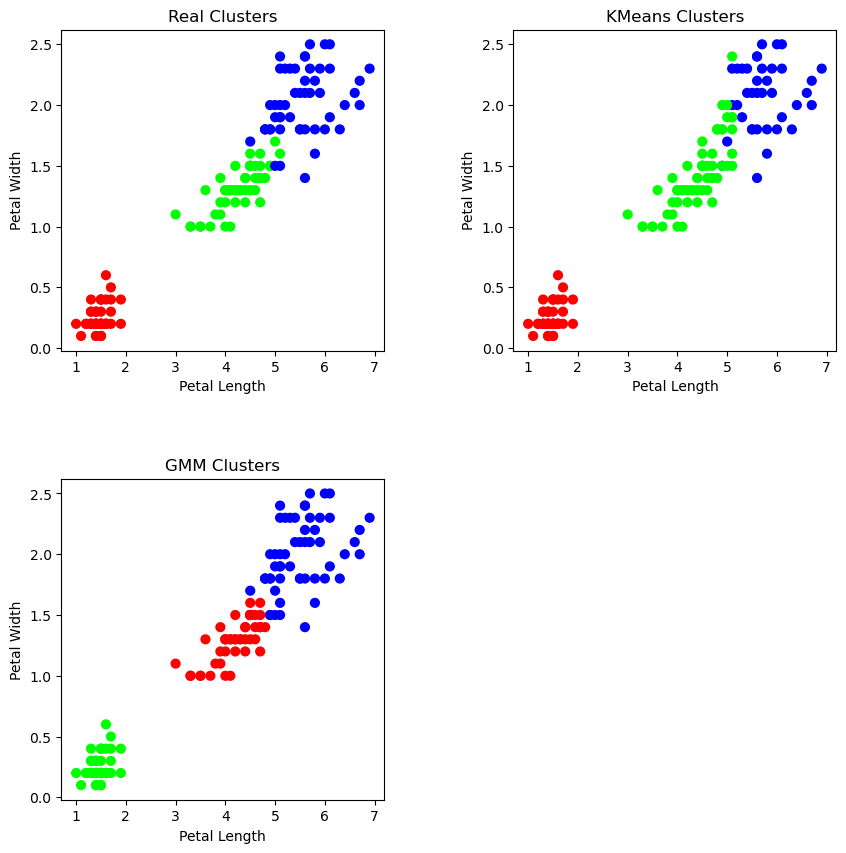

In [19]:
# Build the KMeans Model
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

from scipy.stats import mode
labels = np.zeros_like(y.Targets)

for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

plt.figure(figsize=(10, 10))
colormap = np.array(['red', 'lime', 'blue'])

# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


from sklearn import preprocessing

# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

xs = pd.DataFrame(scaled_X, columns = X.columns)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm_y = gmm.fit_predict(xs)

labels = np.zeros_like(y.Targets)

for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]
    
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


In [20]:
gmm_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
cat

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
labels[cat]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## LSTM

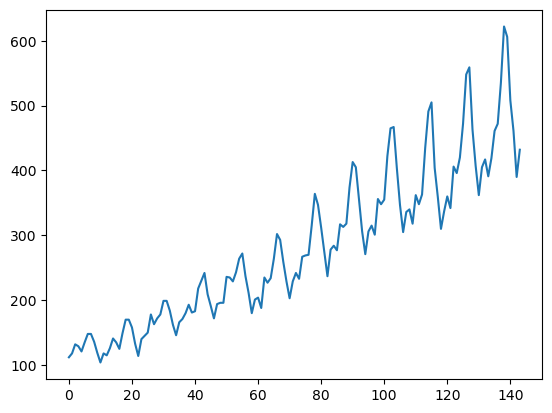

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
 
df = pd.read_csv('airline-passengers.csv')
timeseries = df[["Passengers"]].values.astype('float32')
 
plt.plot(timeseries)
plt.show()

In [2]:
# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]

In [3]:
import torch
 
def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset
    
    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [4]:

lookback = 1
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([95, 1, 1]) torch.Size([95, 1, 1])
torch.Size([47, 1, 1]) torch.Size([47, 1, 1])


/tmp/ipykernel_17720/2861746758.py:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /croot/pytorch_1686931851744/work/torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(X), torch.tensor(y)


In [5]:
import torch.nn as nn
 
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [6]:

import numpy as np
import torch.optim as optim
import torch.utils.data as data
 
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)
 
n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 226.1101, test RMSE 422.5318
Epoch 100: train RMSE 186.0142, test RMSE 380.5642
Epoch 200: train RMSE 152.2531, test RMSE 344.1586
Epoch 300: train RMSE 122.7973, test RMSE 310.6126
Epoch 400: train RMSE 99.4371, test RMSE 281.0566
Epoch 500: train RMSE 81.2956, test RMSE 254.7537
Epoch 600: train RMSE 65.1387, test RMSE 229.4309
Epoch 700: train RMSE 52.6150, test RMSE 206.3791
Epoch 800: train RMSE 43.2632, test RMSE 185.7821
Epoch 900: train RMSE 36.3467, test RMSE 167.6669
Epoch 1000: train RMSE 31.7879, test RMSE 152.0515
Epoch 1100: train RMSE 28.5670, test RMSE 139.4280
Epoch 1200: train RMSE 26.5905, test RMSE 128.9941
Epoch 1300: train RMSE 25.6737, test RMSE 121.4915
Epoch 1400: train RMSE 24.7141, test RMSE 115.0765
Epoch 1500: train RMSE 24.2748, test RMSE 109.7050
Epoch 1600: train RMSE 23.8668, test RMSE 106.5050
Epoch 1700: train RMSE 23.5842, test RMSE 103.0178
Epoch 1800: train RMSE 23.4868, test RMSE 101.0580
Epoch 1900: train RMSE 23.3187, test RM

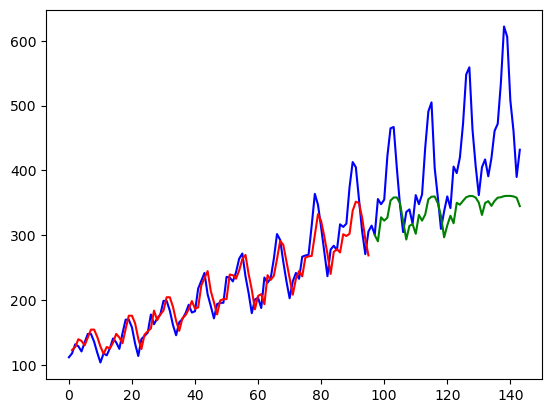

In [7]:

with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(timeseries) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(timeseries) * np.nan
    test_plot[train_size+lookback:len(timeseries)] = model(X_test)[:, -1, :]
# plot
plt.plot(timeseries, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')
plt.show()